In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from numpy import loadtxt
from numpy import genfromtxt
import pandas as pd
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
file_name = "no__epilepsy.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name = "epilepsy.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# load the dataset
A=pd.DataFrame()
for file_name in os.listdir('/content/no__epilepsy'):
    if fnmatch.fnmatch(file_name, '*.txt'):
            #print(file_name)
            data = open("/content/no__epilepsy/"+file_name,'rb')
           # print(f.readlines())
            A=A.append([data.readlines()])


In [ ]:
print(A[0][0])

0           b'LENGTH OF THE RECORDING:  15 minutes.\n'
0    b'CLINICAL HISTORY:  The patient is a 74-year-...
0    b'CLINICAL HISTORY:  72 year old right handed ...
0    b'REASON FOR STUDY:  Forgetfulness and headach...
0    b'CLINICAL HISTORY: 73 year old right handed w...
                           ...                        
0           b'LENGTH OF THE RECORDING:  27 minutes.\n'
0    b'CLINICAL HISTORY:  76 year old man with hist...
0    b'CLINICAL HISTORY:  Elderly woman with severe...
0    b'CLINICAL HISTORY: 81 year old left handed wo...
0    b'CLINICAL HISTORY:  43 year old right handed ...
Name: 0, Length: 105, dtype: object


In [ ]:
for x in A[0]:
  x= x.lower()
  print(x)

b'clinical history:  75 year old woman who is vent dependent and trached postoperative day 21 of lung biopsy with a waxing and waning mental status.\n'
b'clinical history:  63 year old male found unresponsive on april 1st, still not back to baseline, somnolent.  renal failure, diabetes, hepatitis c, hypertension, nonadherent to medications.\n'
b'clinical history:  a 57-year-old lady who came in with a change in mental status. lp showed increased wbcs.  she was transferred today for possible subarachnoid hemorrhage.  there was no subarachnoid hemorrhage in the ct scan.  past medical history is significant for hiv, diabetes, and schizophrenia.\n'
b'clinical history:  this is an 81-year-old male with fever and change of mental status.  no other clinical information available.\n'
b'clinical history: 32 year old male with abrupt onset left-sided chest pain and difficulty speaking and abnormal csf with discitis.\n'
b'clinical history:  19 year old female with learning disability, asthma, adh

In [ ]:
def remove_punctuation(line):
  no_punc = "".join([c for c in line if c not in string.punctuation ])
  return no_punc

In [ ]:
import nltk
nltk.download('stopwords')
  
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words("english"))

from nltk.tokenize import word_tokenize
def stopWords (line) :
  tokens = word_tokenize(line)
  line = [i for i in tokens if not i in stop_words]
  return line

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
for line in A[0] :
  line = line.lower()
  line = remove_punctuation(str(line))
  line = stopWords(line)
  print(line)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['bclinical', 'history', '75', 'year', 'old', 'woman', 'vent', 'dependent', 'trached', 'postoperative', 'day', '21', 'lung', 'biopsy', 'waxing', 'waning', 'mental', 'statusn']
['bclinical', 'history', '63', 'year', 'old', 'male', 'found', 'unresponsive', 'april', '1st', 'still', 'back', 'baseline', 'somnolent', 'renal', 'failure', 'diabetes', 'hepatitis', 'c', 'hypertension', 'nonadherent', 'medicationsn']
['bclinical', 'history', '57yearold', 'lady', 'came', 'change', 'mental', 'status', 'lp', 'showed', 'increased', 'wbcs', 'transferred', 'today', 'possible', 'subarachnoid', 'hemorrhage', 'subarachnoid', 'hemorrhage', 'ct', 'scan', 'past', 'medical', 'history', 'significant', 'hiv', 'diabetes', 'schizophrenian']
['bclinical', 'history', '81yearold', 'male', 'fever', 'change', 'mental', 'status', 'clinical', 'information', 'availablen']
['bclinical', 'history', '32', 'year', 'old',

In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
corpus = line
cv = CountVectorizer()
x= cv.fit_transform(A[0][0])
data=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())


In [ ]:
data

,01,07,08,10,11,12,15,16,18,19,1980,1997,1st,20,2010,2011,2012,2013,21,22,23,24,26,27,27th,28,30,32,33,34,35,37,41,42,43,44,45,47,48,50,...,total,toxoplasmosis,trached,transferred,transient,traumas,twisting,twitching,two,type,undergo,unresponsive,unsteady,using,vent,ventriculostomy,wakefulness,waning,was,waxing,wbcs,weakness,week,weeks,well,where,which,while,who,with,without,woman,worsening,year,years,yesterday,yo,yr,zygoma,zygomatic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
102,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.to_csv(r'/content/no__epilepsy/noepy.csv', index = False)
df=pd.read_csv("/content/no__epilepsy/noepy.csv")


In [ ]:
df.insert((569),'label',0)

In [ ]:
import fnmatch
from numpy import loadtxt
import numpy as np
AB=pd.DataFrame()
for file_name in os.listdir('/content/epilepsy'):
    if fnmatch.fnmatch(file_name, '*.txt'):
            #print(file_name)
            f = open("/content/epilepsy/"+file_name,'rb')
           # print(f.readlines())
            AB=AB.append([f.readlines()])
           # lines=np.append(f,'0')
           # lines=np.insert(lines,0,file_name)
           # A=A.append([lines])
            #data= np_array_values.append(f.readlines())

In [ ]:
for x in AB[0]:
  x= x.lower()
  print(x)

b'clinical history:  an elderly man with confusion.\n'
b'clinical history:  a 44-year-old male with adult onset complex partial epilepsy, refractory, tonic-clonic, and secondarily generalized medicines.\n'
b'clinical history:  a 19-year-old male with epilepsy, seizure free for the last 4 years.  previous eegs.  he has hearing impairment and attention deficit disorder.  at age 15 he had 2.5 hz spike and wave activity on an outside eeg, but by age 17 his eeg had become normal.\n'
b'\n'
b'clinical history:  55 year old woman with right mca infarct on june 18, status post t-pa.  hemorrhagic conversion.  right craniotomy on june 19.  persistently high intracranial pressure.  previously treated with propofol and fentanyl which failed to control her icp, now transitioned to alternative therapy.  massive right mca infarct with edema.\n'
b'clinical history:  an 82-year-old woman with metastatic cancer, cerebral metastasis found unresponsive, not able to move the right side and then had 2 tonic 

In [ ]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
for line in AB[0] :
  line = line.lower()
  line = remove_punctuation(str(line))
  line = stopWords(line)
  print(line)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['bclinical', 'history', 'elderly', 'man', 'confusionn']
['bclinical', 'history', '44yearold', 'male', 'adult', 'onset', 'complex', 'partial', 'epilepsy', 'refractory', 'tonicclonic', 'secondarily', 'generalized', 'medicinesn']
['bclinical', 'history', '19yearold', 'male', 'epilepsy', 'seizure', 'free', 'last', '4', 'years', 'previous', 'eegs', 'hearing', 'impairment', 'attention', 'deficit', 'disorder', 'age', '15', '25', 'hz', 'spike', 'wave', 'activity', 'outside', 'eeg', 'age', '17', 'eeg', 'become', 'normaln']
['bn']
['bclinical', 'history', '55', 'year', 'old', 'woman', 'right', 'mca', 'infarct', 'june', '18', 'status', 'post', 'tpa', 'hemorrhagic', 'conversion', 'right', 'craniotomy', 'june', '19', 'persistently', 'high', 'intracranial', 'pressure', 'previously', 'treated', 'propofol', 'fentanyl', 'failed', 'control', 'icp', 'transitioned', 'alternative', 'therapy', 'ma

In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
corpus = line
cv = CountVectorizer()
x= cv.fit_transform(AB[0][0])
dataS=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())


In [ ]:
dataS.to_csv(r'/content/no__epilepsy/epy.csv', index = False)
df1=pd.read_csv("/content/no__epilepsy/epy.csv")

In [ ]:
df1.insert((1010),'label',1)

In [ ]:
df2=df1.drop(columns=['00', '01','02','03','05','06','07','08','13weeks','15th','17th','18th','1971','1979','1980','1984','1999','2003','2007','2009','2010','2011','2012','2013','12th','29th','30s'])

In [ ]:
final=pd.DataFrame()
final=pd.concat([df,df2])
final

,01,07,08,10,11,12,15,16,18,19,1980,1997,1st,20,2010,2011,2012,2013,21,22,23,24,26,27,27th,28,30,32,33,34,35,37,41,42,43,44,45,47,48,50,...,unremarkable,unresponsiveness,until,unusual,up,upper,urinary,urosepsis,use,usual,usually,vacation,vague,valve,varied,ventricular,versed,versus,video,vimpat,violent,viral,vision,visual,vomiting,vp,wanders,warm,wave,waves,wednesday,wellbutrin,what,when,will,withdrawal,word,work,would,young
0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,1,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final.fillna(final.mean())

,01,07,08,10,11,12,15,16,18,19,1980,1997,1st,20,2010,2011,2012,2013,21,22,23,24,26,27,27th,28,30,32,33,34,35,37,41,42,43,44,45,47,48,50,...,unremarkable,unresponsiveness,until,unusual,up,upper,urinary,urosepsis,use,usual,usually,vacation,vague,valve,varied,ventricular,versed,versus,video,vimpat,violent,viral,vision,visual,vomiting,vp,wanders,warm,wave,waves,wednesday,wellbutrin,what,when,will,withdrawal,word,work,would,young
0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,...,0.002398,0.016787,0.009592,0.004796,0.014388,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.002398,0.009592,0.004796,0.002398,0.002398,0.021583,0.004796,0.004796,0.002398,0.002398,0.007194,0.016787,0.002398,0.019185,0.002398,0.002398,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.007194,0.002398,0.004796,0.002398,0.007194
1,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,1.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,...,0.002398,0.016787,0.009592,0.004796,0.014388,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.002398,0.009592,0.004796,0.002398,0.002398,0.021583,0.004796,0.004796,0.002398,0.002398,0.007194,0.016787,0.002398,0.019185,0.002398,0.002398,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.007194,0.002398,0.004796,0.002398,0.007194
2,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,...,0.002398,0.016787,0.009592,0.004796,0.014388,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.002398,0.009592,0.004796,0.002398,0.002398,0.021583,0.004796,0.004796,0.002398,0.002398,0.007194,0.016787,0.002398,0.019185,0.002398,0.002398,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.007194,0.002398,0.004796,0.002398,0.007194
3,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,...,0.002398,0.016787,0.009592,0.004796,0.014388,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.002398,0.009592,0.004796,0.002398,0.002398,0.021583,0.004796,0.004796,0.002398,0.002398,0.007194,0.016787,0.002398,0.019185,0.002398,0.002398,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.007194,0.002398,0.004796,0.002398,0.007194
4,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0,0.000000,0,0,1,0,0,0.000000,0,0,0,0,0,0,0,0,0,...,0.002398,0.016787,0.009592,0.004796,0.014388,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.002398,0.009592,0.004796,0.002398,0.002398,0.021583,0.004796,0.004796,0.002398,0.002398,0.007194,0.016787,0.002398,0.019185,0.002398,0.002398,0.002398,0.002398,0.004796,0.002398,0.002398,0.004796,0.002398,0.007194,0.002398,0.004796,0.002398,0.007194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.009524,0.009524,0.009524,0,0,0,0,0,0,0,0.009524,0.009524,0.009524,0,0.038095,0.019048,0.047619,0.009524,0,0,0,0,0.019048,0,0.009524,0,0,0,0,0,0.009524,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
413,0.009524,0.0095

In [ ]:
print(final.isna().sum().sort_values(ascending=False))

01                 417
nonhemorrhagic     417
objects            417
occurred           417
op                 417
                  ... 
hospital             0
hospitalization      0
hospitalized         0
hour                 0
evaluated            0
Length: 1180, dtype: int64


In [ ]:
# word level tf-idf

corpus = line
tv = TfidfVectorizer(analyzer='word')
x= tv.fit_transform(AB[0][0])
data_V=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())

2.2 TF-IDF Vectors as features

In [ ]:

# word level tf-idf

corpus = line
tv = TfidfVectorizer(analyzer='word')
x= tv.fit_transform(AB[0][0])
final=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())


In [ ]:
final

,00,01,02,03,05,06,07,08,10,11,12,12th,13,13weeks,14,15,15th,16,17,17th,18,18th,19,1971,1979,1980,1984,1999,20,2003,2007,2009,2010,2011,2012,2013,21,22,23,24,...,ventricular,versed,versus,video,vimpat,violent,viral,vision,visual,vomiting,vp,wanders,warm,was,wave,waves,weakness,wednesday,week,weeks,well,wellbutrin,what,when,where,which,while,who,will,with,withdrawal,without,woman,word,work,worsening,would,year,years,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362206,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.210937,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.102367,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071936,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.069820,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.156290,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.151694,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.103825,0.0,0.0,0.168083,0.0,0.0,0.0,0.0,0.100772,0.344484,0.0
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.099772,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.096838,0.000000,0.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318002,0.0,0.216088,0.0,0.0,0.174913,0.0,0.0,0.0,0.0,0.104867,0.000000,0.0
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.085917,0.0,0.0,0.139091,0.0,0.0,0.0,0.0,0.083390,0.0

In [ ]:
final.isna().sum() 

01            417
07            417
08            417
10              0
11              0
             ... 
withdrawal    105
word          105
work          105
would         105
young         105
Length: 1180, dtype: int64

In [ ]:
final.isna().sum().sum()

145782

In [ ]:
final.fillna(final.median())

,01,07,08,10,11,12,15,16,18,19,1980,1997,1st,20,2010,2011,2012,2013,21,22,23,24,26,27,27th,28,30,32,33,34,35,37,41,42,43,44,45,47,48,50,...,unremarkable,unresponsiveness,until,unusual,up,upper,urinary,urosepsis,use,usual,usually,vacation,vague,valve,varied,ventricular,versed,versus,video,vimpat,violent,viral,vision,visual,vomiting,vp,wanders,warm,wave,waves,wednesday,wellbutrin,what,when,will,withdrawal,word,work,would,young
0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final.isna().sum().sum()

145782

In [ ]:
new= final.fillna(final.mean())

In [ ]:
new.isna().sum().sum()

0

In [ ]:
print(new.isna().sum().sort_values(ascending=False))

young         0
playing       0
opsoclonus    0
or            0
other         0
             ..
feel          0
felbamate     0
fentanyl      0
few           0
01            0
Length: 1180, dtype: int64


In [ ]:
x= new.iloc[:,1:1179].values
y=new['label']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
#naive_bayes
gnb = naive_bayes.MultinomialNB()
gnb.fit(x_train,y_train)
predictions = gnb.predict(x_test)
metrics.accuracy_score(predictions, y_test)

0.8952380952380953

linear classifier

In [ ]:
# Linear Classifier on Count Vectors
gnb = linear_model.LogisticRegression()
gnb.fit(x_train,y_train)
predictions = gnb.predict(x_test)
metrics.accuracy_score(predictions, y_test)


1.0

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
gnb = RandomForestClassifier()
gnb.fit(x_train,y_train)
predictions = gnb.predict(x_test)
metrics.accuracy_score(predictions, y_test)


1.0

In [ ]:
pip install xgboost


Boosting Model

In [ ]:
import xgboost as xgb


In [ ]:
# Extereme Gradient Boosting on Count Vectors
# Linear Classifier on Count Vectors
import xgboost as xgb
gnb = xgboost.XGBClassifier()
gnb.fit(x_train,y_train)
predictions = gnb.predict(x_test)
metrics.accuracy_score(predictions, y_test)



0.9904761904761905

Text(0, 0.5, 'Erreur')

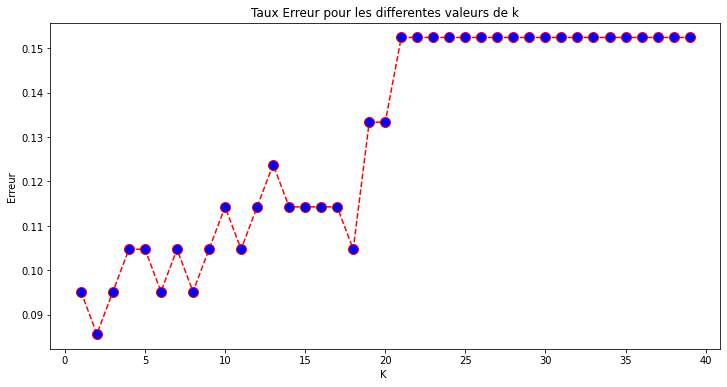

In [ ]:
#KNeighborsclassifier

error = []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(x_train, y_train)
    pred_i = knn_model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [ ]:
knn = KNeighborsClassifier(2)
knn_model = knn.fit(x_train, y_train)
y_pred_knn =knn_model.predict(x_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.91


In [ ]:
#decision tree
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
grid.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8,

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
final_model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=1 )
final_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print('test_score = ', final_model.score(x_test, y_test))

test_score =  0.9904761904761905


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [ ]:
random_state = 2
classifiers = []
classifiers.append(RandomForestClassifier())
classifiers.append(linear_model.LogisticRegression())
classifiers.append(naive_bayes.MultinomialNB())
classifiers.append(xgboost.XGBClassifier())
classifiers.append(KNeighborsClassifier(2))
classifiers.append(DecisionTreeClassifier())




In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))

   CrossValMeans  CrossValerrors      Algorithm
0       1.000000        0.000000  Random forest
1       1.000000        0.000000   linear model
2       0.825761        0.057021    naive bayes
3       1.000000        0.000000           XGBC
4       0.838549        0.048592            KNN
5       0.991414        0.010176           CART


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


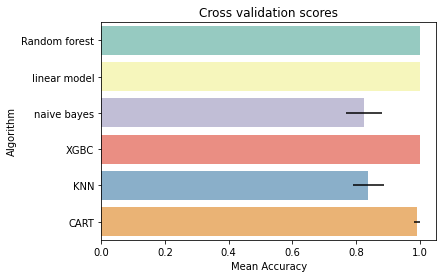

In [ ]:
import seaborn as sns 
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Random forest","linear model",
"naive bayes","XGBC","KNN","CART"]})
print(cv_res)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")